In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/achille/opt/miniconda3/envs/cdae/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


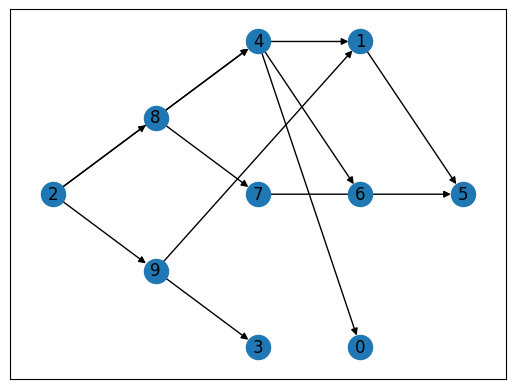

In [7]:
import networkx as nx

from causal_model import CausalModel, scale_mechanism
from simulated_data import random_dag, generate_gaussian_mlp_mean_mechanisms_for_graph
from simulated_data.utils import draw_dag_topological_sort

import matplotlib.pyplot as plt

from utils import set_random_seed_all
set_random_seed_all(0)

dag = random_dag(10, 12)

draw_dag_topological_sort(dag)

In [8]:
causal_model = CausalModel(dag)
observational_mechanisms = generate_gaussian_mlp_mean_mechanisms_for_graph(causal_model, [], scale=0.1)
causal_model.set_causal_mechanisms(observational_mechanisms)

n_interventions = 10
tau = 0
# let's only intervene on one node at a time, by knocking down their mechanisms by tau
for i in range(n_interventions):
    nodes = [str(i)]
    new_intervened_mechanisms = {
        n: scale_mechanism(observational_mechanisms[n], tau) for n in nodes
    }
    causal_model.set_intervention(str(i), new_intervened_mechanisms)

In [9]:
n_samples = 100
samples_observational = causal_model.sample_from_observational_distribution(n_samples)
samples_interventional1 = causal_model.sample_from_interventional_distribution(n_samples,"2")
samples_interventional2 = causal_model.sample_from_interventional_distribution(n_samples,"8")



In [10]:
causal_model.causal_mechanisms["8"].conditional_parameters_func


MLP(
  (mlp): DenseLayers(
    (activation): Sigmoid()
    (layers): ModuleList(
      (0): Linear(in_features=1, out_features=1, bias=True)
    )
    (batch_norms): ModuleList()
  )
)

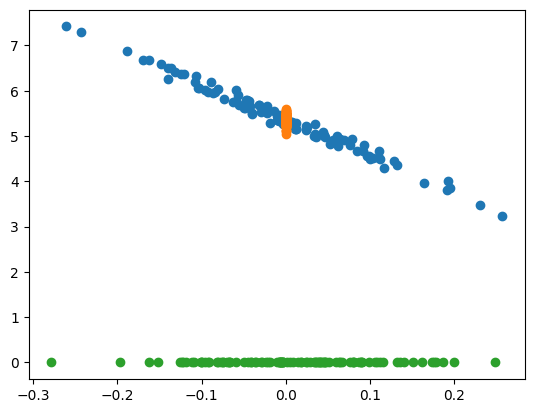

In [11]:
for data in [samples_observational, samples_interventional1, samples_interventional2]:
    plt.scatter(
        data["2"].numpy(),
        data["8"].numpy(),
    )